<b><p style="text-align: center; font-size: 25px;font-family: 'Times New Roman';">Communicate Data Findings : Ford GoBike System Data Analysis<br><br>
Janani R</p></b>


### Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area from 28th June, 2017 to 31st December, 2017. <a href="https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv">Data</a>


In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import warnings
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from geopy.distance import geodesic 
from scipy import stats

%matplotlib inline

warnings.filterwarnings('ignore')

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#Import Data
bikes = pd.read_csv("2017-fordgobike-tripdata.csv")

In [3]:
#Explore 
print(bikes.info())
print(bikes.head())
print(bikes.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB
None
   duration_sec                start_time                  end_time  \

### What is the structure of your dataset?

Each trip is anonymized and includes:

Trip Duration (seconds)<br>
Start Time and Date<br>
End Time and Date<br>
Start Station ID<br>
Start Station Name<br>
Start Station Latitude<br>
Start Station Longitude<br>
End Station ID<br>
End Station Name<br>
End Station Latitude<br>
End Station Longitude<br>
Bike ID<br>
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)<br>
Member Year of Birth<br>
Member Gender

There are 519700 records. There is high amount of variation with respect to duration with a standard deviation of 3444. But 75% of the values lie below 1000 which is something to consider while trimming outliers. 

### What is/are the main feature(s) of interest in your dataset?

1. How long does the average trip take?
2. When are most trips taken in terms of time of day, day of the week, or month of the year?
3. Does the average duration depend on if a user is a subscriber or customer?
4. What's the moving average of number of trips over days?
5. What age range do subscribers tend to lie in?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. Member Year of Birth (5)
2. Trip Duration (1, 3)
3. Start and End Time (2, 4)
4. User Type (3, 5)
 

## Univariate Exploration

> Trip Duration statistics reveal that 75% of the values are below 1000. So, let's do a boxplot to visualize the interquartile range and outliers in the dataset.

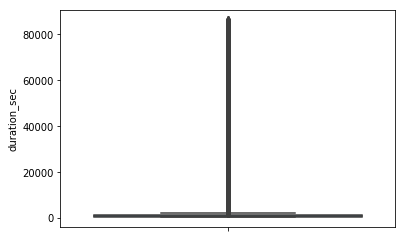

In [4]:
sns.boxplot(data=bikes, y='duration_sec');

That wasn't very clear, let's try a histogram

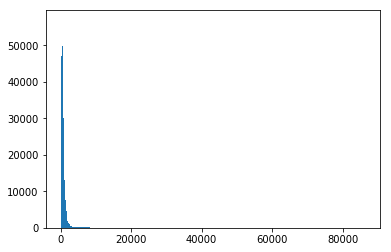

In [5]:
graph = bikes.duration_sec
plt.hist(graph,bins=1000);

Add range to the histogram

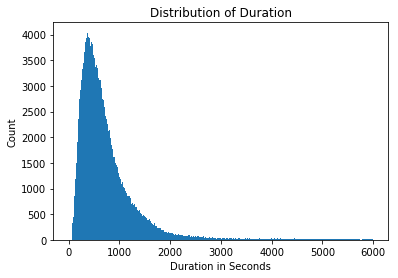

In [6]:
graph = bikes.duration_sec
plt.hist(graph,bins=1000,range=(0,6000));
plt.title("Distribution of Duration")
plt.xlabel('Duration in Seconds')
plt.ylabel('Count');

Since most of the values seem to lie below 4000, let's remove the outliers, since average duration depends on trip duration being realistic.
For this, I compute the Z score of each duration value and remove it if is below 3. That is, remove all values beyond two standard deviations. <a href="https://www.investopedia.com/terms/z/zscore.asp">More Info</a>

In [7]:
bikes = bikes[(np.abs(stats.zscore(bikes.duration_sec)) < 3)]

In [8]:
bikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,514555.000000,514555.000000,514555.000000,514555.000000,514555.000000,514555.000000,514555.000000,514555.000000,451221.000000
mean,829.409134,95.083387,37.771635,-122.363929,92.184363,37.771821,-122.363227,1673.800293,1980.401659
std,984.135445,85.979249,0.086270,0.105537,84.817561,0.086189,0.105083,971.290846,10.511220
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,380.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,789.000000,1974.000000
50%,591.000000,67.000000,37.782411,-122.398870,66.000000,37.783813,-122.398525,1730.000000,1983.000000
75%,923.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2522.000000,1988.000000
max,11431.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


99% records are retained and the max is much closer to 75% of the values, so let's visualize again

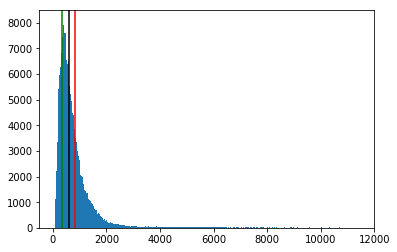

In [9]:
graph = bikes.duration_sec
plt.hist(graph,bins=1000);
plt.axvline(graph.mean(),color='red');
plt.axvline(statistics.mode(graph),color='green');
plt.axvline(statistics.median(graph),color='black');

Average Duration is : 

In [10]:
bikes.duration_sec.mean()

829.4091341061694

Does the average duration depend on if a user is a subscriber or customer?

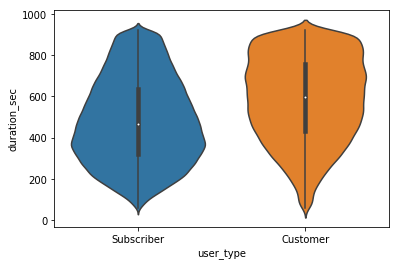

In [11]:
sns.violinplot(data=bikes[bikes.duration_sec<=923],x='user_type',y='duration_sec');

Seems like duration is higher if the user type is a one time customer. However, this might also be dependent on the distance between locations, so an average should be taken over location to location and plotted

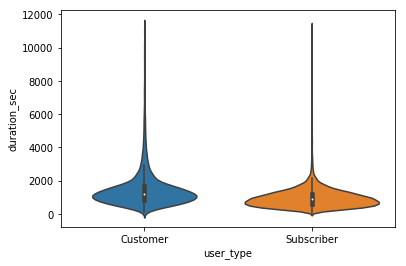

In [12]:
sns.violinplot(data=bikes.groupby(['start_station_id','end_station_id','user_type'])['duration_sec'].mean().reset_index(),
              x='user_type',y='duration_sec');

Subscriber seems to have lesser duration, compared to Customer.

When are most trips taken in terms of time of day, day of the week, or month of the year?

In [13]:
# Date columns which are strings need to be converted
def strip_time(date):
    return datetime.strptime(date,'%Y-%m-%d %H:%M:%S.%f')

bikes['start_t'] = bikes.start_time.apply(lambda x:strip_time(x))
bikes['end_t'] = bikes.end_time.apply(lambda x:strip_time(x))

# Create separate columns for all attributes of date for every date column
def convert_timestamp_to_attributes(df):
    for date_column in df.columns.values:
        df[date_column+'_day'] = df[date_column].apply(lambda x:x.day)
        df[date_column+'_dayofweek'] = df[date_column].apply(lambda x:x.dayofweek)
        df[date_column+'_dayname'] = df[date_column].apply(lambda x:x.strftime('%a'))
        df[date_column+'_dayofyear'] = df[date_column].apply(lambda x:x.dayofyear)
        df[date_column+'_hour'] = df[date_column].apply(lambda x:x.hour)
        df[date_column+'_month'] = df[date_column].apply(lambda x:x.month)
        df[date_column+'_weekofyear'] = df[date_column].apply(lambda x:x.weekofyear)
        df[date_column+'_year'] = df[date_column].apply(lambda x:x.year)
    return df

def convert_df_to_timedf(df):
    time_df = df.select_dtypes(include=[np.datetime64])
    return df.merge(convert_timestamp_to_attributes(time_df))

bikes = convert_df_to_timedf(bikes)

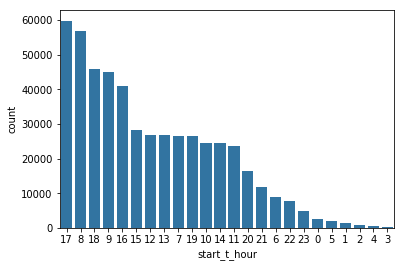

In [14]:
# By hour
sns.countplot(data=bikes,x='start_t_hour',
              order=bikes.start_t_hour.value_counts().index,
              color=sns.color_palette()[0]);

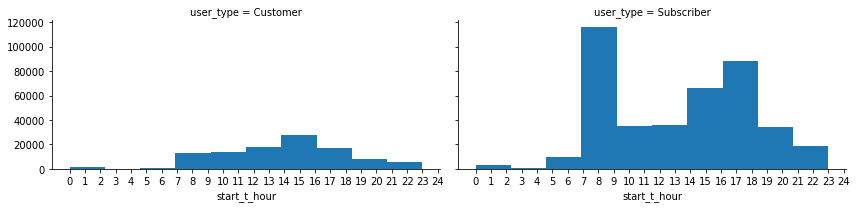

In [15]:
g = sns.FacetGrid(data=bikes, col='user_type',aspect=2)
g.map(plt.hist,'start_t_hour');
plt.tight_layout()
plt.xticks(np.arange(0,25,1));

Although customers tend to rent bikes seemingly uniformly, except for a peak in the afternoons, regular users(subscribers), seem to rent it in the mornings and evenings, which suggest that they take it for work.

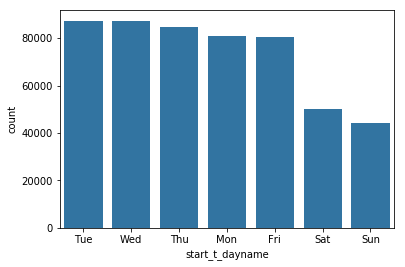

In [16]:
# By weekday
sns.countplot(data=bikes,x='start_t_dayname',
              order=bikes.start_t_dayname.value_counts().index,
              color=sns.color_palette()[0]);

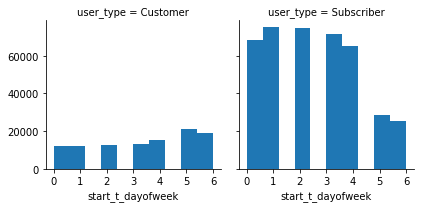

In [17]:
g = sns.FacetGrid(data=bikes, col='user_type')
g.map(plt.hist,'start_t_dayofweek');
plt.tight_layout()
plt.xticks(np.arange(0,7,1));
# 0 being Monday

Subscribers tend to drive more during the weekdays reinforcing the theory of bikes being considered a mode of transport for work.

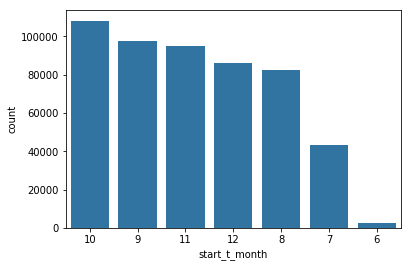

In [18]:
# By month
sns.countplot(data=bikes,x='start_t_month',
              order=bikes.start_t_month.value_counts().index,
              color=sns.color_palette()[0]);

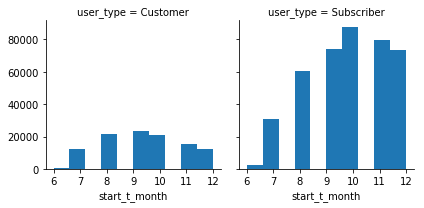

In [19]:
g = sns.FacetGrid(data=bikes, col='user_type')
g.map(plt.hist,'start_t_month');
plt.tight_layout()
plt.xticks(np.arange(6,13,1));

Irrespective of user type, demand seems to be slightly more during the September and October months.

What's the moving average of number of trips over days/hours/weekdays?

In [20]:
# Create a new surrogate key for the dataframe
bikes['trip_id'] = bikes.apply(lambda x:str(x.bike_id)+'_'+x.start_time,axis=1)

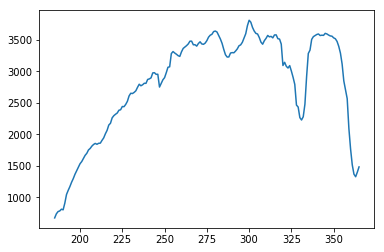

In [22]:
tripcount_by_day = bikes.groupby('start_t_dayofyear')['trip_id'].count()
plt.plot(tripcount_by_day.rolling(window=7).mean());

Above graph indicates a steep start moving towards a strong demand during the months of august, september and october, with a dip in November and finally a big dip during Christmas.

What age range do subscribers tend to lie in?

In [21]:
# Age column can be created based on member_birth_year
bikes['age'] = bikes['member_birth_year'].apply(lambda x:(datetime.now().year-x))

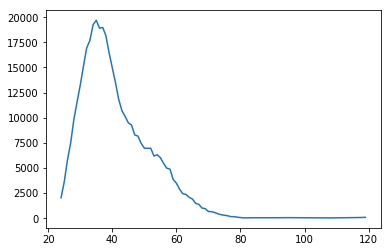

In [23]:
tripcount_by_age = bikes[bikes.user_type=='Subscriber'].groupby('age')['trip_id'].count()
plt.plot(tripcount_by_age.rolling(window=5).mean());

The peak is around middle aged folks.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Duration in seconds had a lot of outliers which were trimmed using Z score as the determinant.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> One of the most interesting observations was the relationship between user type and start hour of the trip. While Subscribers rented it in the mornings and evenings, Customers rented it sporadically, peaking slightly in the afternoon, suggesting that Subscribers used the bikes as a mode of transport for work.

## Bivariate Exploration

> Here are some of the combinations we shall be exploring : 
1. User Type and Duration in seconds
2. User Type and Age
3. Gender and Duration in seconds
4. Gender and Age
5. Member Gender and User Type
6. Duration and Age

In [24]:
# Setting the base color
base_color = sns.color_palette()[0]

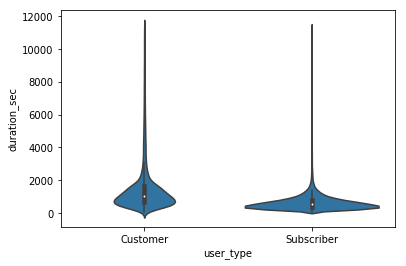

In [25]:
# User Type and Duration
sns.violinplot(data=bikes,x='user_type',y='duration_sec', color=base_color);

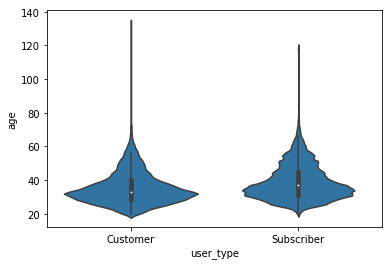

In [26]:
# User Type and Age
sns.violinplot(data=bikes,x='user_type',y='age', color=base_color);

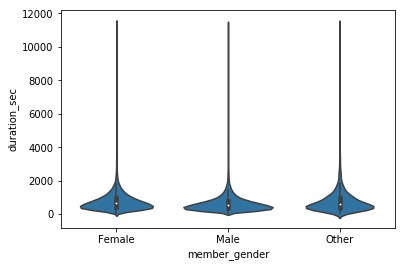

In [28]:
# Gender and Duration
sns.violinplot(data=bikes,x='member_gender',y='duration_sec', color=base_color);

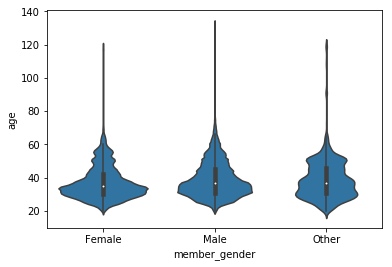

In [27]:
# Gender and Age
sns.violinplot(data=bikes,x='member_gender',y='age', color=base_color);

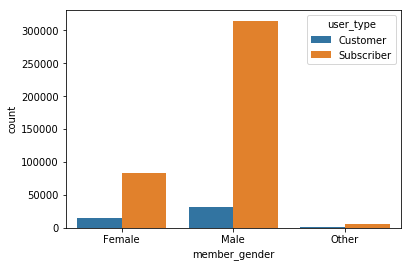

In [30]:
# Gender and User Type
sns.countplot(data=bikes, x='member_gender',hue='user_type');

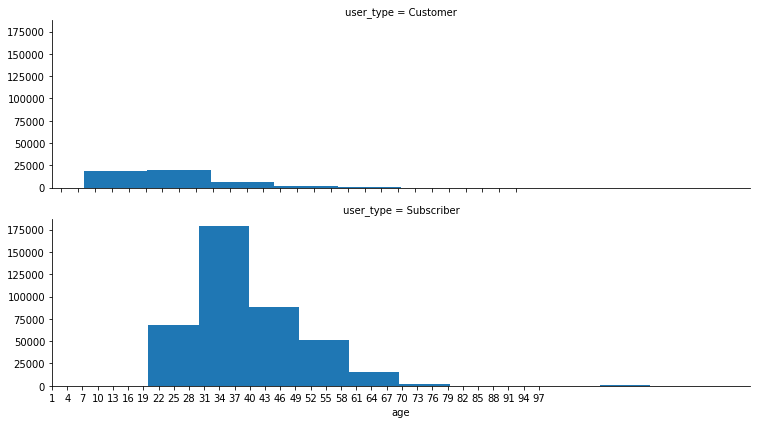

In [29]:
# User Type and Age
g = sns.FacetGrid(data=bikes, col='user_type', col_wrap=1, aspect=14.7*2/8.27)
g.map(plt.hist,'age');
plt.xticks(np.arange(1,100,3));

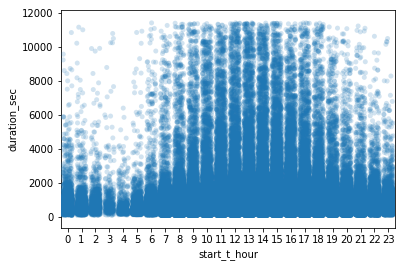

In [33]:
# Duration and Hour
sns.stripplot(data = bikes, x='start_t_hour', y='duration_sec', alpha=0.2,jitter=0.35,color=base_color);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It is already established that subscribers seem to finish their trips faster than customers, the 1st plot further reinforces that point. Although males rent more bikes, the duration seems to be similar across genders. Nothing significant for the relationships with age except for the one with user type. In the Subscribers group, the dominant age group of users seems to be 30-40

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There seems to be an interesting relationship between the time taken to complete a trip and the starting hour. Probably an indication of traffic...

## Multivariate Exploration

> 1. User Type, Age and Duration in Seconds
2. Gender, Age and Duration in Seconds
3. Gender, User Type and Duration in Seconds
4. Duration and Hour with respect to Start and End Locations

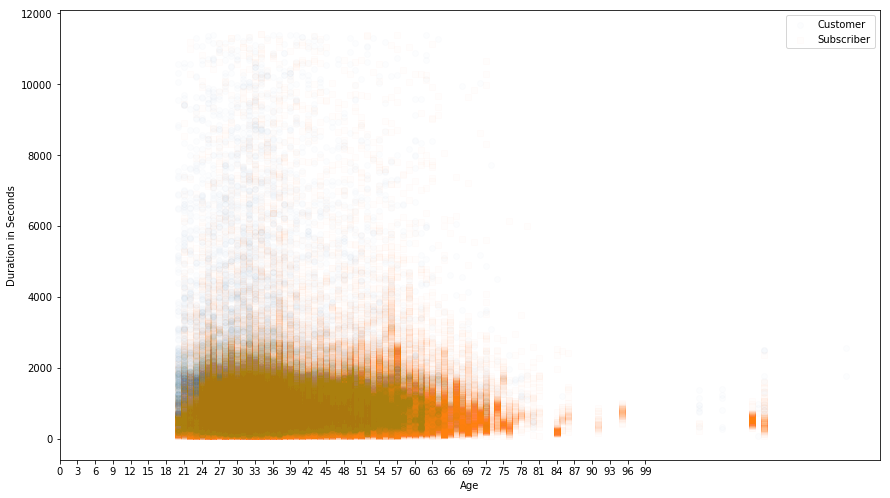

In [38]:
cat_markers = [['Customer', 'o'],
               ['Subscriber', 's']]

plt.figure(figsize=[14.70, 8.27])
for cat, marker in cat_markers:
    df_cat = bikes[bikes['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'age', y = 'duration_sec', marker = marker,alpha=0.01)
plt.legend(['Customer','Subscriber']);
plt.xticks(np.arange(0,100,3))
plt.ylabel('Duration in Seconds');
plt.xlabel('Age');

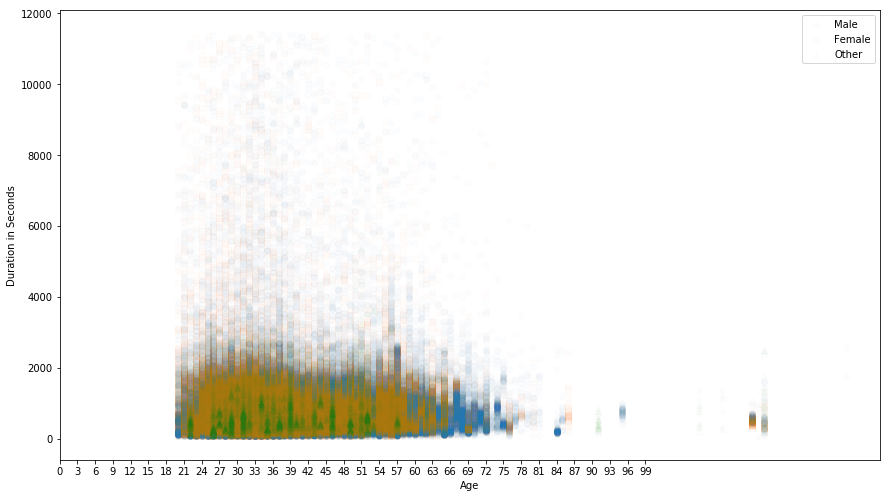

In [39]:
cat_markers = [['Male', 'o'],
               ['Female', 's'],
               ['Other', '^']]

plt.figure(figsize=[14.70, 8.27])
for cat, marker in cat_markers:
    df_cat = bikes[bikes['member_gender'] == cat]
    plt.scatter(data = df_cat, x = 'age', y = 'duration_sec', marker = marker,alpha=0.01)
plt.legend(['Male','Female','Other']);
plt.xticks(np.arange(0,100,3))
plt.ylabel('Duration in Seconds');
plt.xlabel('Age');

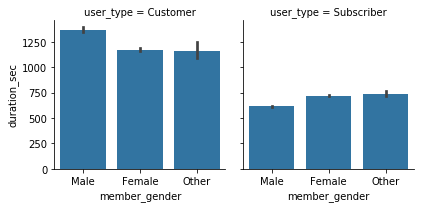

In [35]:
g = sns.FacetGrid(data=bikes, col='user_type')
g.map(sns.barplot,'member_gender','duration_sec');
plt.tight_layout();

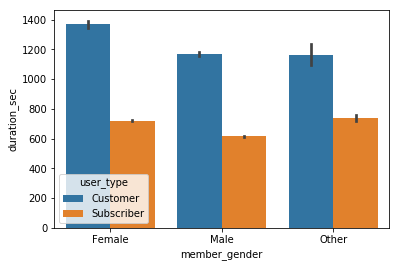

In [37]:
sns.barplot(data=bikes, x='member_gender',y='duration_sec',hue='user_type');

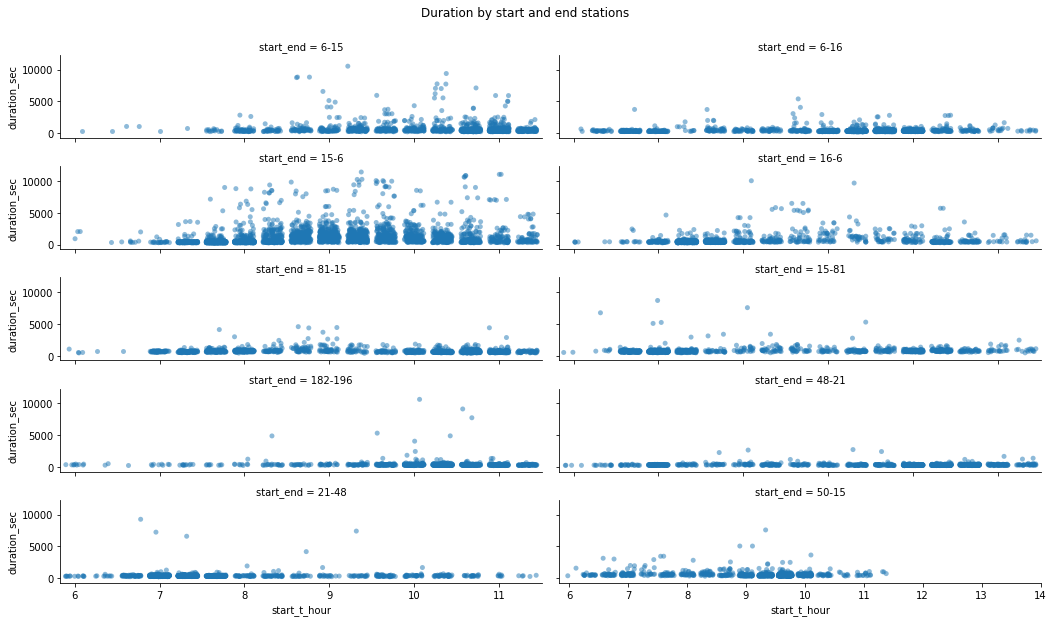

In [34]:
# Create key to capture start and end locations
bikes['start_end'] = bikes.apply(lambda x:str(x['start_station_id'])+'-'+str(x['end_station_id']),axis=1)

# Find commonly trafficked start and end locations
top_locations = list(bikes.groupby(['start_end'])['trip_id'].count().sort_values(ascending=False)[:10].index.values)

# Plot the trips only for such locations
tripdata_by_location = bikes[bikes.start_end.isin(top_locations)]
g = sns.FacetGrid(data=tripdata_by_location, col='start_end',col_wrap=2,height=(8.27/5),aspect=(14.7/2)/(8.27/5))
g.map(sns.stripplot,'start_t_hour', 'duration_sec',alpha=0.5,jitter=0.35);
plt.suptitle("Duration by start and end stations", y = 1.04)
plt.tight_layout()
plt.xticks(np.arange(0,25,3));

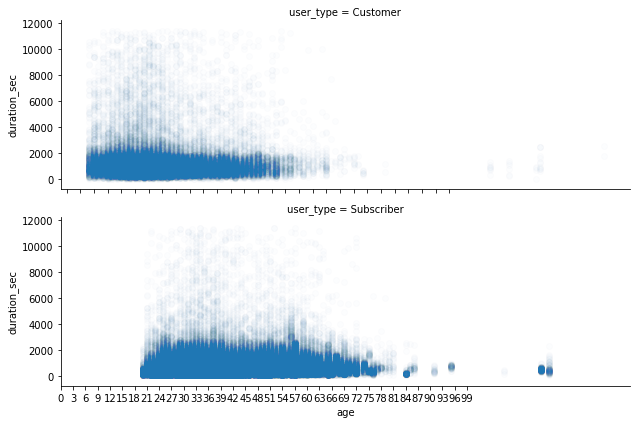

In [36]:
# let's plot the relationship between duration and age per user type

g = sns.FacetGrid(data=bikes, col='user_type',col_wrap=1,aspect=3)
g.map(plt.scatter,'age', 'duration_sec',alpha=0.01);
plt.xticks(np.arange(0,100,3));

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Results seem to be pretty uniform across genders, age and user types, except for the fact that the number of trips decrease drastically with age. Especially post 60.

### Were there any interesting or surprising interactions between features?

> As expected, trip data seems to be most during the 9 am to 6 pm timeline, across stations with high traffic. One more interesting thing was that Subscribers seem to be in the age group of 20 to 80, whereas casual customers were in the age group 5-60.